# Analysis and Visualization part 2

In [106]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


# plotting pie charts and comparision of Method of payment over years.

In [107]:
# Import and clean Payment Data 
payment_data_path = "CleanData/MethodofPayment.csv"
PaymentMethod_df = pd.read_csv(payment_data_path)
PaymentMethod_df = PaymentMethod_df.rename(columns={"Debit Card": "Debit", "Credit Card": "Credit"})

# Summerrize data by year
pivot_table = pd.pivot_table(PaymentMethod_df, index=["Year"], values=["Cash", "Debit", "Credit", "Other "], aggfunc="sum")
sum_Payment_df = pivot_table
sum_Payment_df.head()

,Cash,Credit,Debit,Other
Year,,,,
2009,233.4,447.6,267.2,51.8
2013,216.1,491.5,209.3,83.1
2017,154.7,614.0,193.1,38.2
2021,103.1,623.2,183.3,90.4


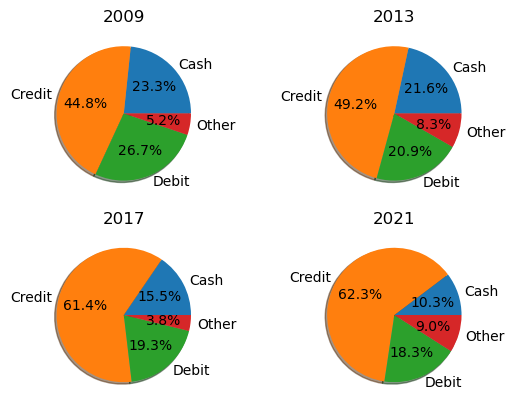

In [108]:
# Data to plot 
labels = 'Cash', 'Credit', 'Debit', 'Other' 
sizes_2009 = [233.4, 447.6, 267.2, 51.8] 
sizes_2013 = [216.1, 491.5, 209.3, 83.1] 
sizes_2017 = [154.7, 614.0, 193.1, 38.2] 
sizes_2021 = [103.1, 623.2, 183.3, 90.4] 

fig, axs = plt.subplots(2, 2) 
axs[0, 0].pie(sizes_2009, labels=labels, autopct='%1.1f%%', shadow=True) 
axs[0, 0].set_title('2009') 
axs[0, 1].pie(sizes_2013, labels=labels, autopct='%1.1f%%', shadow=True) 
axs[0, 1].set_title('2013') 
axs[1, 0].pie(sizes_2017, labels=labels, autopct='%1.1f%%', shadow=True) 
axs[1, 0].set_title('2017') 
axs[1, 1].pie(sizes_2021, labels=labels, autopct='%1.1f%%', shadow=True) 
axs[1, 1].set_title('2021') 

# Save the plot as a PNG image file
plt.savefig("pie_charts.png", dpi=200)

# show plot 
plt.show()

In [109]:
# Import and clean Liabilities Data 
Liabilities_data_path = "CleanData/Liabilities.csv"
Liabilities_df = pd.read_csv(Liabilities_data_path)
Liabilities_df = Liabilities_df.rename(columns={"REF_DATE": "Year","VALUE": "Amount", "Credit liabilities of households": "Credit_Liabilities"})
Liabilities_df['Year'] = pd.to_datetime(Liabilities_df['Year']).dt.year


#Liabilities_df.head()

# Summerrize data by year
Liabilities_df = Liabilities_df[['Year', 'Credit_Liabilities', 'Amount']]
pivot_table = pd.pivot_table(Liabilities_df, values='Amount', index='Year', columns=['Credit_Liabilities'], aggfunc=np.sum)
pivot_table.head()


Credit_Liabilities,Chartered banks,Credit cards,Credit unions and caisse populaires,Financial vehicle corporations engaged in securitization,Government,Home equity lines of credit,Lines of credit,"Lines of credit, of which: excluding home equity lines of credit",Mortgage loans,Non-bank financial corporations,...,Of which: off balance-sheet NHA-MBS,Of which: real estate secured lending,Other financial corporations n.e.i.,Other lenders n.e.i.,Other personal loans,Personal loans,Residential mortgages,Total credit liabilities of households,Trust companies and mortgage loan companies,Unincorporated business
Year,,,,,,,,,,,,,,,,,,,,,
2009,16152309,648132,1952431,4002081,190565,1846184,2343469,569178,10796755,7518670,...,3248888,12642939,1438001,145995,232793,648396,21404012,17104679,126157,248090
2010,17864464,682701,2071507,4176589,203846,2075497,2625194,640976,11681912,7716475,...,3541924,13757409,1314891,159744,272252,705839,23167166,18294147,153488,261932
2011,20659245,799031,2234644,3010592,220813,2177656,2762211,689859,12565155,7275388,...,2552301,14742811,1590573,166767,267203,788553,24925730,19400111,439579,270395
2012,27173207,921374,2377869,366716,238231,2351802,2905184,669435,13309692,4815632,...,148652,15661494,1628298,166267,245485,871156,26405744,20298853,442749,276789
2013,28480346,880984,2511615,404306,267714,2361617,2949434,707776,13963352,4911435,...,142107,16324969,1619105,173499,224085,1045148,27693206,21163677,376409,283719


In [100]:
#Create required dataframe
Liabilities_required_df = pivot_table[['Credit cards', 'Total credit liabilities of households']]


Liabilities_required_df 

Credit_Liabilities,Credit cards,Total credit liabilities of households
Year,,
2009,648132,17104679
2010,682701,18294147
2011,799031,19400111
2012,921374,20298853
2013,880984,21163677
2014,895696,22082806
2015,923048,23222348
2016,951960,24494205
2017,984283,25817262


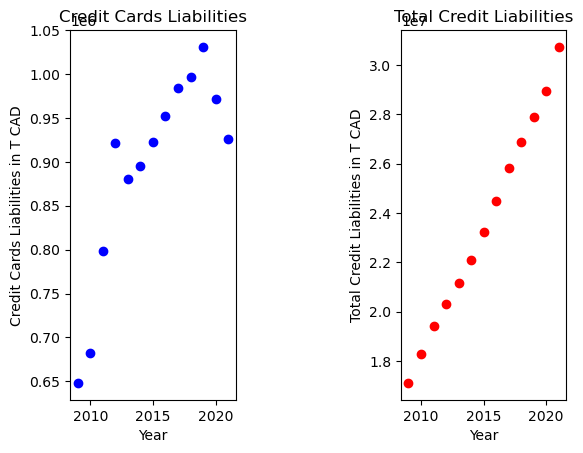

In [116]:
# Plot the scatter plots
year = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021] 
credit_cards = Liabilities_required_df["Credit cards"] 
total_liabilities = Liabilities_required_df["Total credit liabilities of households"]

fig = plt.figure()
fig.subplots_adjust(hspace=1.5, wspace=1)

# First subplot
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(year, credit_cards, color='b')
ax1.set_title('Credit Cards Liabilities')
ax1.set_xlabel('Year')
ax1.set_ylabel('Credit Cards Liabilities in T CAD')

# Second subplot
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(year, total_liabilities, color='r')
ax2.set_title('Total Credit Liabilities')
ax2.set_xlabel('Year')
ax2.set_ylabel('Total Credit Liabilities in T CAD')

# Save the plot as a PNG image file
plt.savefig("scatter_plots.png", dpi=100)


plt.show()

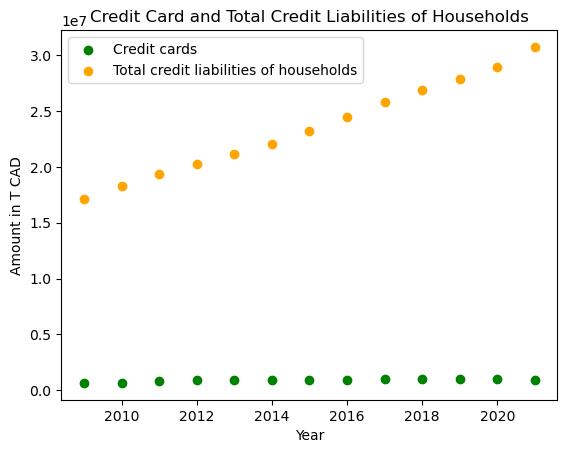

In [102]:
# X-axis values 
x = [2009,2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021] 
# Y-axis values 
y1 = credit_cards = Liabilities_required_df["Credit cards"]
y2 = Liabilities_required_df["Total credit liabilities of households"]
# plotting points as a scatter plot 
plt.scatter(x, y1, label= "Credit cards", color= "green") 
plt.scatter(x, y2, label= "Total credit liabilities of households", color= "orange") 
# x-axis label 
plt.xlabel('Year') 
# frequency label 
plt.ylabel('Amount in T CAD') 
# plot title 
plt.title('Credit Card and Total Credit Liabilities of Households') 
# showing legend 
plt.legend() 

# function to show the plot 
plt.show()

# Boxplots for Household spending

In [117]:
# Importing and cleaning HouseHold Spending Data
spending_file = "Data/spending2-3610012401-noSymbol.csv"
spending_df = pd.read_csv(spending_file, encoding="utf-8", on_bad_lines='skip')

# Create a new column 'Quarter' that contains the quarter of each year
spending_df['Quarter'] = spending_df['Year'].str[:2]
spending_df['Year'] = spending_df['Year'].str[3:]

# Summarize columns to match Payment Data
spending_df['Food and entertainment'] = spending_df[['Food and non-alcoholic beverages', 'Alcoholic beverages, tobacco and cannabis', 'Recreation and culture']].sum(axis=1)
spending_df['Travel and Transport'] = spending_df[['Transport', 'Accommodation services']].sum(axis=1)

#Drop Combined columns 
spending_df.drop(columns=['Food and non-alcoholic beverages', 'Alcoholic beverages, tobacco and cannabis', 'Recreation and culture', 'Transport', 'Accommodation services', 'Quarter' ], inplace=True)

# Rename columns for Asthetics on Graph
spending_df.rename(columns={"Furnishings, household equipment and other goods and services related to the dwelling and property": "Furniture", "Insurance and financial services" : "Insurance", "Miscellaneous goods and services": "Miscellaneous"}, inplace=True)


pivot = pd.pivot_table(spending_df, index=['Year'], 
                              values=['Clothing and footwear', 'Furniture', 'Health', 
                                      'Communications', 'Education', 'Insurance', 
                                      'Miscellaneous', 'Net expenditure abroad', 
                                      'Food and entertainment', 'Travel and Transport'], 
                              aggfunc='sum')

pivot.index = pivot.index.astype(int)
pivot.drop([2003, 2004, 2005, 2006, 2007, 2008, 2022,], inplace=True)

spending_df = pivot
spending_df.head(15)


,Clothing and footwear,Communications,Education,Food and entertainment,Furniture,Health,Insurance,Miscellaneous,Net expenditure abroad,Travel and Transport
Year,,,,,,,,,,
2009,36824,22550,12162,201481,51526,37537,74669,45872,13384,128185
2010,38478,23421,13169,207166,52702,39522,80704,47866,15290,140336
2011,39679,24744,14114,212421,53082,41070,84381,49873,16450,151259
2012,40632,25559,15140,217512,53600,42190,84478,51756,17392,158619
2013,42055,26839,16227,221896,54925,43764,88827,53371,17794,167301
2014,43974,28207,17184,229317,57214,45386,94556,55636,17629,176277
2015,46569,29520,18177,236696,59377,47520,98811,57757,17379,176516
2016,47270,30725,19261,242228,61778,49661,101962,59759,12631,182340
2017,48831,32825,20510,250565,64617,51921,107239,62452,11856,198974


In [118]:
#Create required dataframe for Household Expenditure
required_df = spending_df[['Clothing and footwear', 'Furniture', 'Health', 
                                      'Communications', 'Education', 'Insurance', 
                                      'Miscellaneous', 'Net expenditure abroad', 
                                      'Food and entertainment', 'Travel and Transport']]
required_df.head(10)

,Clothing and footwear,Furniture,Health,Communications,Education,Insurance,Miscellaneous,Net expenditure abroad,Food and entertainment,Travel and Transport
Year,,,,,,,,,,
2009,36824,51526,37537,22550,12162,74669,45872,13384,201481,128185
2010,38478,52702,39522,23421,13169,80704,47866,15290,207166,140336
2011,39679,53082,41070,24744,14114,84381,49873,16450,212421,151259
2012,40632,53600,42190,25559,15140,84478,51756,17392,217512,158619
2013,42055,54925,43764,26839,16227,88827,53371,17794,221896,167301
2014,43974,57214,45386,28207,17184,94556,55636,17629,229317,176277
2015,46569,59377,47520,29520,18177,98811,57757,17379,236696,176516
2016,47270,61778,49661,30725,19261,101962,59759,12631,242228,182340
2017,48831,64617,51921,32825,20510,107239,62452,11856,250565,198974


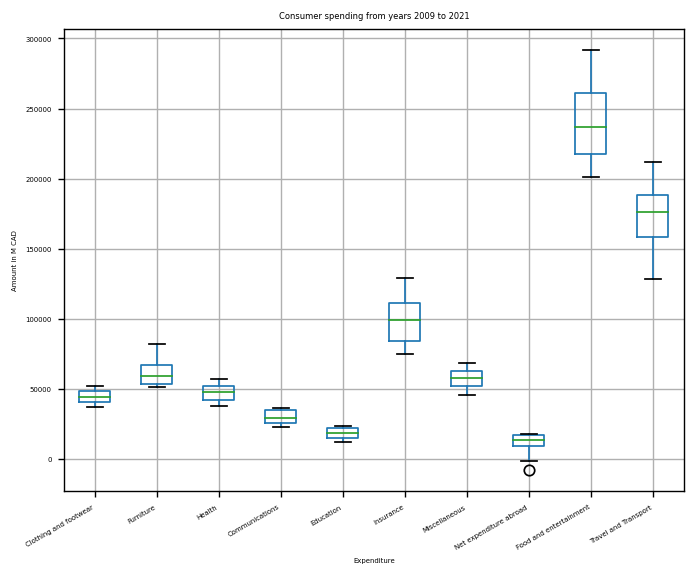

In [130]:
#Plot the boxplot
plt.rcParams.update({'font.size': 4})
plt.figure(dpi=125)
required_df.boxplot()
plt.xticks(rotation=30, horizontalalignment='right')
plt.xlabel('Expenditure')
plt.ylabel('Amount in M CAD')
plt.title('Consumer spending from years 2009 to 2021')

# Save the plot as a PNG image file
plt.savefig("boxplots.png", dpi=200)

plt.show()